<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-Kemish12/blob/main/CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columnas en el dataset: ['Run', 'Event', 'pt1', 'eta1', 'phi1', 'Q1', 'dxy1', 'iso1', 'pt2', 'eta2', 'phi2', 'Q2', 'dxy2', 'iso2']


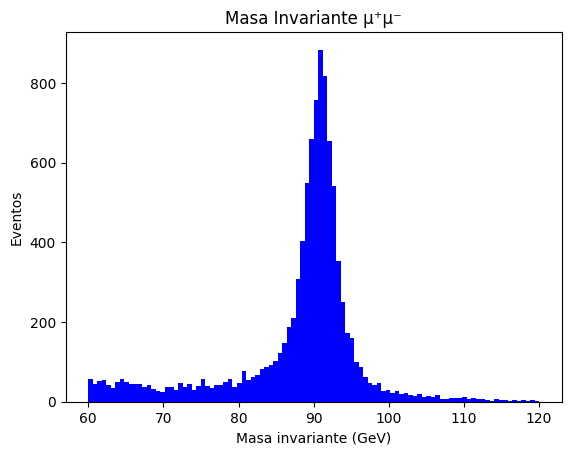

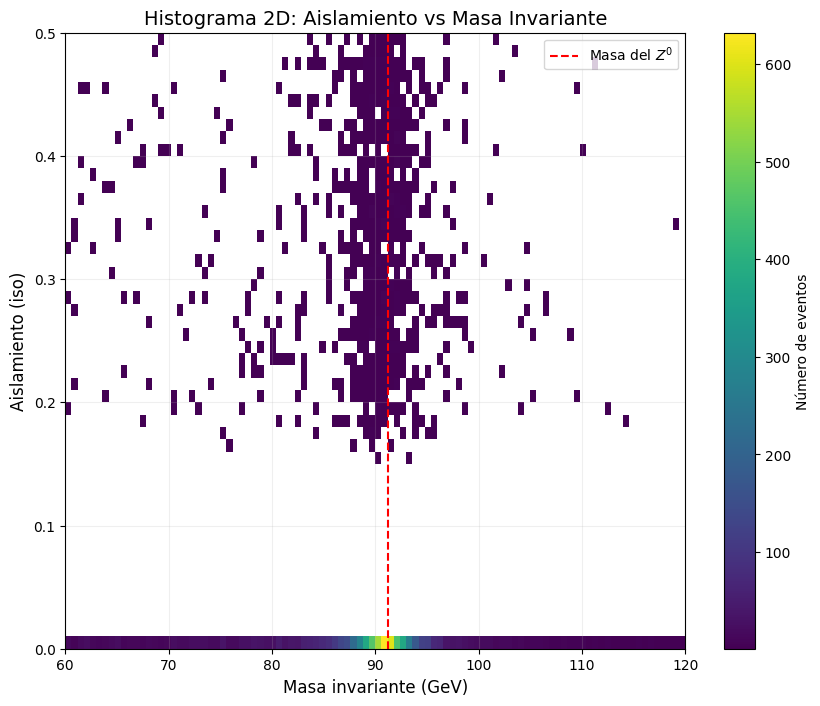

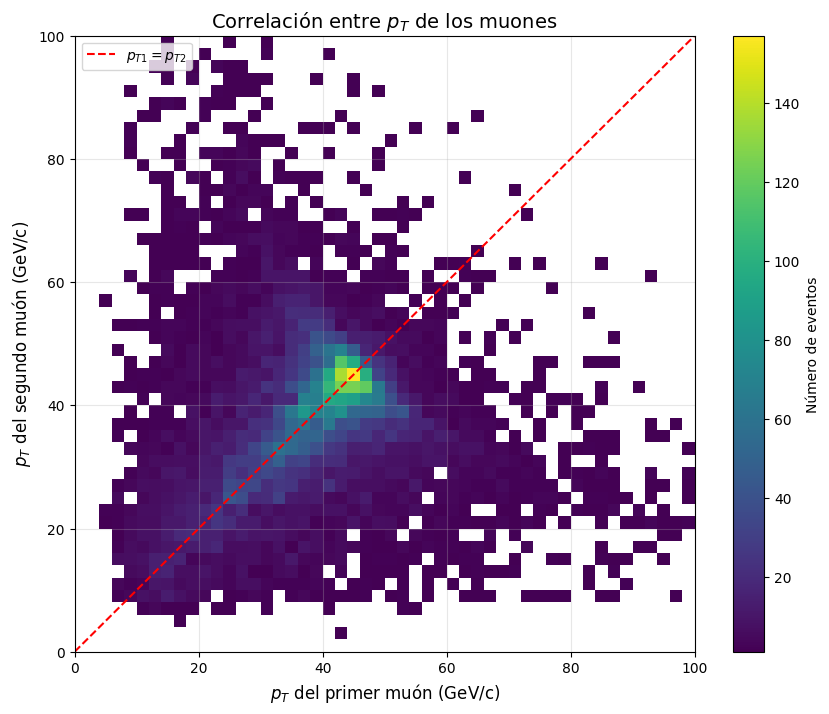

Text(0, 0.5, 'Iso')

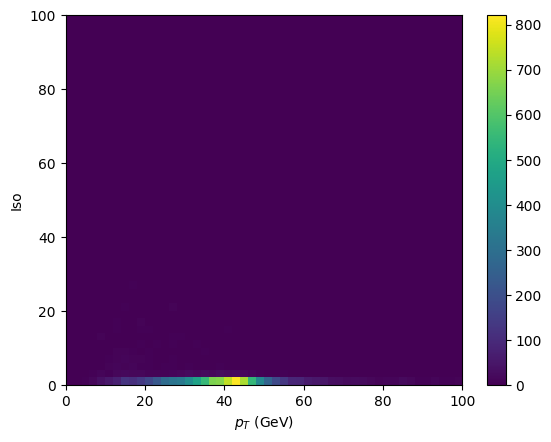

In [25]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
import matplotlib.pyplot as plt
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()

print("Columnas en el dataset:", particles.columns.tolist())
fig_iso = px.histogram(muons, x='iso',
                       nbins=100,  # Número de bins
                       title="Distribución del Aislamiento (Iso) de los muones",
                       labels={'iso': 'Aislamiento (Iso)'},
                       color_discrete_sequence=['blue'])
fig_iso.update_layout(bargap=0.1)  # Espacio entre barras
fig_iso.show()

# Calcular masa invariante (si no está en el dataset)
particles['m_inv'] = np.sqrt(2 * particles['pt1'] * particles['pt2'] *
                     (np.cosh(particles['eta1'] - particles['eta2']) -
                     np.cos(particles['phi1'] - particles['phi2'])))

plt.hist(particles['m_inv'], bins=100, range=(60, 120), color='blue')
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Eventos")
plt.title("Masa Invariante μ⁺μ⁻")
plt.show()

# 2. Seleccionar los datos de aislamiento (ejemplo: iso1) y masa invariante
iso = particles['iso1']
m_inv = particles['m_inv']

# 3. Crear el histograma 2D
plt.figure(figsize=(10, 8))  # Tamaño de la figura
plt.hist2d(
    m_inv,                # Eje X: masa invariante
    iso,                  # Eje Y: aislamiento
    bins=(100, 50),       # Número de bins (X, Y)
    range=[[60, 120], [0, 0.5]],  # Rango [Xmin, Xmax], [Ymin, Ymax]
    cmap='viridis',       # Mapa de colores (opcional: 'plasma', 'inferno', etc.)
    cmin=1                # Ignorar bins con menos de 1 evento (mejora el contraste)
)

# 4. Personalizar la gráfica
plt.colorbar(label='Número de eventos')  # Barra de colores
plt.xlabel('Masa invariante (GeV)', fontsize=12)
plt.ylabel('Aislamiento (iso)', fontsize=12)
plt.title('Histograma 2D: Aislamiento vs Masa Invariante', fontsize=14)
plt.grid(alpha=0.2)  # Cuadrícula transparente

# 5. Añadir línea vertical para la masa del Z⁰ (91.2 GeV)
plt.axvline(x=91.1876, color='red', linestyle='--', linewidth=1.5, label='Masa del $Z^0$')
plt.legend()

plt.show()  # Mostrar la gráfica

pt1 = particles['pt1']
pt2 = particles['pt2']
plt.figure(figsize=(10, 8))
plt.hist2d(
    pt1,                # Eje X: pt del primer muón
    pt2,                # Eje Y: pt del segundo muón
    bins=(50, 50),      # Número de bins (ajusta según necesites)
    range=[[0, 100], [0, 100]],  # Rango [Xmin, Xmax], [Ymin, Ymax]
    cmap='viridis',     # Mapa de colores ('plasma', 'inferno', etc.)
    cmin=1              # Ignorar bins con menos de 1 evento
)

# Personalización
plt.colorbar(label='Número de eventos')
plt.xlabel('$p_T$ del primer muón (GeV/c)', fontsize=12)
plt.ylabel('$p_T$ del segundo muón (GeV/c)', fontsize=12)
plt.title('Correlación entre $p_T$ de los muones', fontsize=14)
plt.grid(alpha=0.3)

# Línea de igualdad (pt1 = pt2) para referencia
plt.plot([0, 100], [0, 100], 'r--', linewidth=1.5, label='$p_{T1} = p_{T2}$')
plt.legend()

plt.show()

plt.hist2d(particles['pt1'], particles['iso1'], bins=(50, 50), range=[[0, 100], [0, 100]], cmap='viridis')
plt.colorbar()
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Iso')

In [ ]:
fig_5=px.histogram(particles['pt2'],particles['pt2'])
fig_5.show()

In [ ]:
fig_5=px.histogram(particles['pt1'],particles['pt1'])
fig_5.show()